420-A52-SF - Apprentissage supervisé - Hiver 2020 - Specialisation technique en Intelligence Artificielle - Mikaël Swawola, M.Sc.
# Travaux Pratiques #2 - Mise en oeuvre de l'algorithme à direction de descente en régression linéaire simple
L'objectif de cette séance de travaux pratique est la mise en oeuvre sous forme de code Python de l'**algorithme à direction de descente en régression linéaire simple**. Le jeu de données utilisé sera une version simplifiée du jeu de données *Advertising*

![title](static/gradient-descent-banner.png)

### 0 - Chargement des bibliothèques

In [1]:
# Manipulation de données
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Outils divers
from tqdm.notebook import tqdm_notebook
from tqdm import tqdm

In [2]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})

### 1 - Lecture du jeu de données advertising

**Exercice 1**: à l'aide de la bibiothèques *pandas*, lire le fichier `advertising-univariate.csv`

In [21]:
# Compléter le code ci-dessous ~ 1 ligne
df = None

### 2 - Définition du modèle et de la fonction de perte

**Exercice 2**: compléter la fonction ci-dessous représentant le modèle de régression linéaire simple (hypothèse)

Pour rappel, le modèle de régression linéaire simple est

$h_{\theta}(x)=\theta_{0} + \theta_{1}x$

In [6]:
def hypothesis(x, theta_0, theta_1):
    # Compléter le code ~ 1 ligne
    h = None
    return h

**Exercice 3**: compléter la fonction ci-dessous permettant le calcul de la perte (fonction de perte)

Pour rappel, la fonction de perte en régression linéaire simple s'exprime sous la forme

$J(\theta_{0},\theta_{1})= \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)}-y^{(i)}))^{2}$

In [22]:
def cost_function(x,y, theta_0, theta_1):
    # Compléter le code ~ 1-4 lignes
    J = None
    return J

### 3 - Préparation de la structure de données

In [8]:
x = df['TV'].values
y = df['sales'].values
x = x/100 # Cette mise à l'échelle permet un meilleur affichage des résultats

### 4 - Algorithme à direction de descente

**Exercice 4**: Compléter l'algorithme à direction de descente. Choisir les valeurs initiales des paramètres, la valeurs du **pas** ($\alpha$) et le **nombre d'itérations**. Un test de convergence ne sera pas utilisé ici.

$
\text{Répéter pendant n_iterations}
\{\\
\theta_{0}:= \theta_{0} - \alpha\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\\
\theta_{1}:= \theta_{1} - \alpha\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\times x^{(i)}
\\
\}
$

In [18]:
theta_0 = None
theta_1 = None
alpha = None
n_iterations = None
m = len(x)

history = defaultdict(list)

for i in tqdm(range(0, n_iterations)):
    
    # Compéter le code ~ 4-6 lignes
    None
    
    # Sauvegarde des valeurs intermédiaires de theta_0, theta_1 et de la perte
    if i%5000 == 0:
        cost = cost_function(x, y, theta_0, theta_1)
        history['theta_0'].append(theta_0)
        history['theta_1'].append(theta_1)
        history['cost'].append(cost)

print(f'Theta_0 = {theta_0}')
print(f'Theta_1 = {theta_1}')

100%|██████████| 400000/400000 [00:08<00:00, 48768.10it/s]

Theta_0 = 7.031367775802829
Theta_1 = 4.754332297268182


### 5 - Affichage du modèle

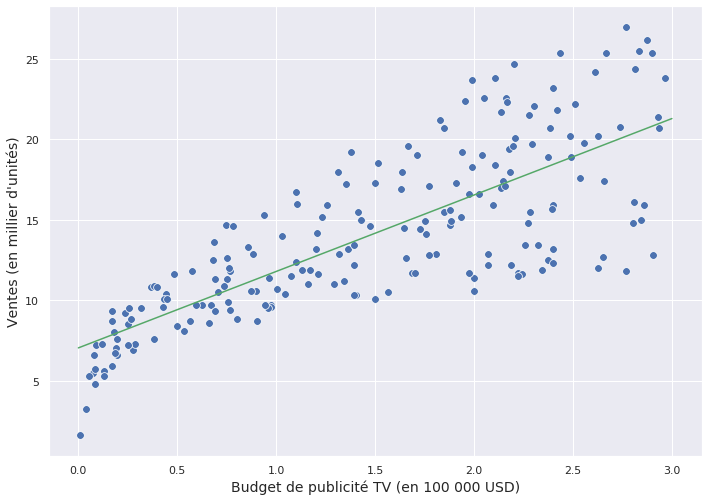

In [19]:
ax = sns.scatterplot(x=x, y=y, s=60)
ax.set_xlabel("Budget de publicité TV (en 100 000 USD)", fontsize=14)
ax.set_ylabel("Ventes (en millier d'unités)", fontsize=14)

X = np.linspace(0,3,100)
Y = hypothesis(X,theta_0,theta_1)
plt.plot(X,Y, color="g")

### 6 - Affichage de l'évolution de $\theta_{0}$, $\theta_{1}$ et la fonction de perte lors de l'optimisation

Text(0.5, 1.0, 'Fonction de perte $J(\\theta_{0},\\theta_{1})$')

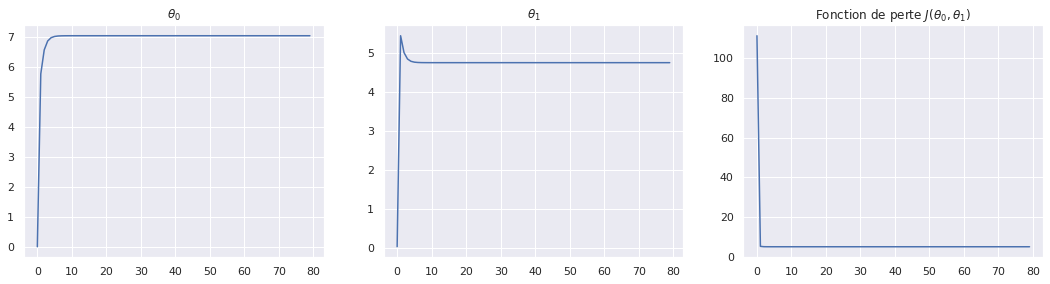

In [16]:
sns.set(rc={'figure.figsize':(18.27,4.27)})
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(history['theta_0'])
ax1.set_title(r'$\theta_{0}$')
ax2.plot(history['theta_1'])
ax2.set_title(r'$\theta_{1}$')
ax3.plot(history['cost'])
ax3.set_title(r'Fonction de perte $J(\theta_{0},\theta_{1})$')

### 7 - Affichage de l'évolution de $\theta_{0}$ et $\theta_{1}$ sur les courbes de niveau (fonction de perte)

Remarque: afin de visualiser les évolutions des paramètres, vous devrez éventuellement diminuer la valuer du pas.

Text(0, 0.5, '$\\theta_{0}$')

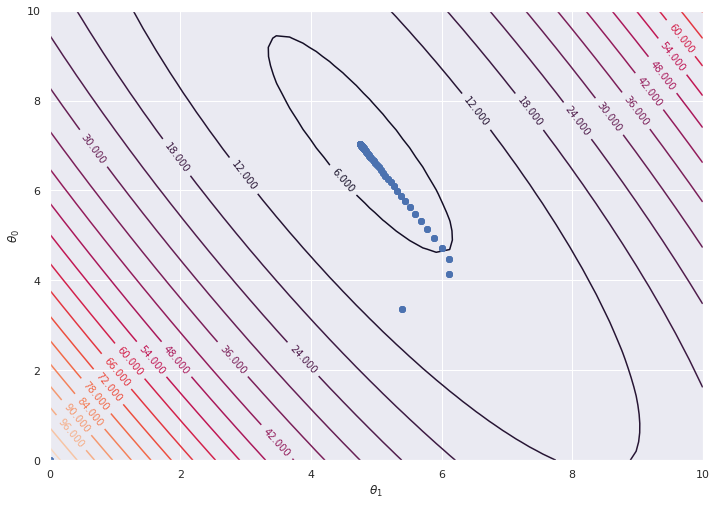

In [20]:
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})
theta_0s = np.linspace(0,10,50)
theta_1s = np.linspace(0,10,50)
mesh = np.zeros((50,50))
for i, theta0 in enumerate(theta_0s):
    for j, theta1 in enumerate(theta_1s):
        mesh[i,j] = cost_function(x, y, theta0, theta1)
        
fig, ax = plt.subplots()
XX, YY = np.meshgrid(theta_0s,theta_1s)
CS = ax.contour(XX, YY, mesh, levels=20)

for h in history:
    ax.plot(history['theta_1'], history['theta_0'], 'bo')

ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r'$\theta_{1}$')
ax.set_ylabel(r'$\theta_{0}$')

### Fin du TP